H vs E vs S

# Nouvelle section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Without Optimiser

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 973ms/step - accuracy: 0.2586 - loss: nan - val_accuracy: 0.3889 - val_loss: nan
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 473ms/step - accuracy: 0.3201 - loss: nan - val_accuracy: 0.3889 - val_loss: nan
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 680ms/step - accuracy: 0.2950 - loss: nan - val_accuracy: 0.3889 - val_loss: nan
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 436ms/step - accuracy: 0.3305 - loss: nan - val_accuracy: 0.3889 - val_loss: nan
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 463ms/step - accuracy: 0.3115 - loss: nan - val_accuracy: 0.3889 - val_loss: nan
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 657ms/step - accuracy: 0.3084 - loss: nan - val_accuracy: 0.3889 - val_loss: nan
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 479ms/step - accuracy: 0.3172 - loss: nan - val_accuracy: 0.3889 - val_loss: nan
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 458ms/step - accuracy: 0.3032 - loss: nan - val_accuracy: 0.3889 - val_loss: nan
Epoch 9/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Final Evaluation Metrics:
Test Accuracy:  0.3888888888888889
Test Recall (Sensitivity):  0.3333333333333333
Test Precision:  0.12962962962962962
Test F1 Score:  0.18666666666666668
Confusion Matrix: 
 [[35  0  0]
 [28  0  0]
 [27  0  0]]
Training Time (seconds):  147.5167956352234


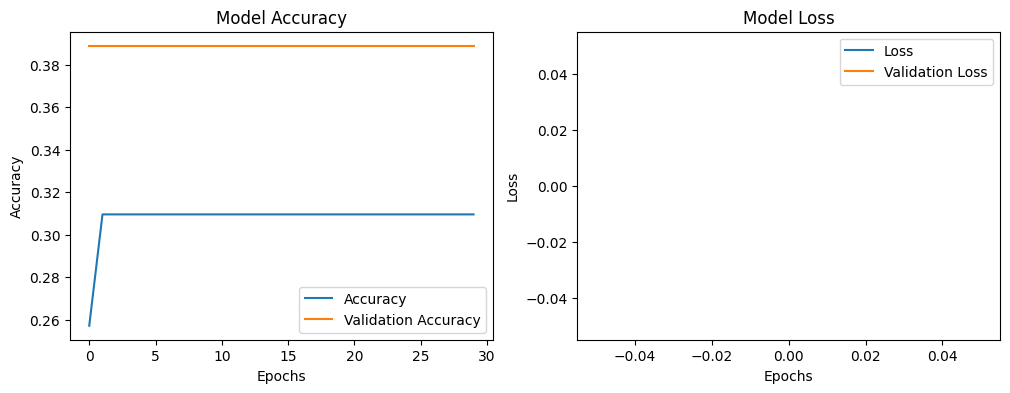

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score
import time
import matplotlib.pyplot as plt

# Function to load data from a directory
def load_data_from_directory(directory_path, label):
    data = []
    labels = []

    if not os.path.exists(directory_path):
        print(f"Error: Directory {directory_path} not found.")
        return np.array([]), np.array([])

    files = [f for f in os.listdir(directory_path) if f.lower().endswith('.txt')]

    if len(files) == 0:
        print(f"No .txt files found in {directory_path}.")
        return np.array([]), np.array([])

    for filename in files:
        file_path = os.path.join(directory_path, filename)
        try:
            file_data = np.loadtxt(file_path)
            data.append(file_data)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {filename}: {e}")

    return np.array(data, dtype=np.float32), np.array(labels)

# Paths to your datasets
path_Healthy = '/content/drive/My Drive/PFA2_DataSet/DataSet/Healthy/Z'
path_Epileptic = '/content/drive/My Drive/PFA2_DataSet/DataSet/Elipy/N'
path_Seizure = '/content/drive/My Drive/PFA2_DataSet/DataSet/Seizeur/S'

# Load data
data_Healthy, labels_Healthy = load_data_from_directory(path_Healthy, label=0)
data_Epileptic, labels_Epileptic = load_data_from_directory(path_Epileptic, label=1)
data_Seizure, labels_Seizure = load_data_from_directory(path_Seizure, label=2)

# Combine data and labels for Healthy + Epileptic vs Seizure
if data_Healthy.size > 0 and data_Epileptic.size > 0 and data_Seizure.size > 0:
    data_all = np.concatenate((data_Healthy, data_Epileptic, data_Seizure), axis=0)
    labels_all = np.concatenate((labels_Healthy, labels_Epileptic, labels_Seizure), axis=0)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data_all, labels_all, test_size=0.3, random_state=42)

    # Define the CNN model
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(3, activation='softmax')  # 3 classes
    ])

    # Compile the model
    model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model and track time
    start_time = time.time()
    history = model.fit(X_train[..., np.newaxis], y_train, epochs=30, batch_size=32, validation_data=(X_test[..., np.newaxis], y_test), verbose=1)
    training_time = time.time() - start_time

    # Evaluate the model
    y_pred = model.predict(X_test[..., np.newaxis])
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred_classes)
    recall = recall_score(y_test, y_pred_classes, average='macro')
    precision = precision_score(y_test, y_pred_classes, average='macro')
    f1 = f1_score(y_test, y_pred_classes, average='macro')
    conf_matrix = confusion_matrix(y_test, y_pred_classes)

    # Print metrics
    print("\nFinal Evaluation Metrics:")
    print("Test Accuracy: ", accuracy)
    print("Test Recall (Sensitivity): ", recall)
    print("Test Precision: ", precision)
    print("Test F1 Score: ", f1)
    print("Confusion Matrix: \n", conf_matrix)
    print("Training Time (seconds): ", training_time)

    # Plot Training History
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

else:
    print("Error: Data loading failed. Ensure the files are present in the directories.")


Code with Standardization

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.3708 - loss: 4.8650 - val_accuracy: 0.5000 - val_loss: 0.8198
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 575ms/step - accuracy: 0.6701 - loss: 0.7396 - val_accuracy: 0.7778 - val_loss: 0.6901
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 630ms/step - accuracy: 0.7289 - loss: 0.6147 - val_accuracy: 0.6444 - val_loss: 0.6178
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 743ms/step - accuracy: 0.8354 - loss: 0.4077 - val_accuracy: 0.8222 - val_loss: 0.4804
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 593ms/step - accuracy: 0.8492 - loss: 0.4450 - val_accuracy: 0.8444 - val_loss: 0.4449
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 720ms/step - accuracy: 0.9690 - loss: 0.2184 - val_accuracy: 0.8556 - val_loss: 0.3247
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 670ms/step - accuracy: 0.8834 - loss: 0.2819 - val_accuracy: 0.8444 - val_loss: 0.3978
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 725ms/step - accuracy: 0.9951 - loss: 0.1153 - val_accuracy: 0.9333 - val_loss: 

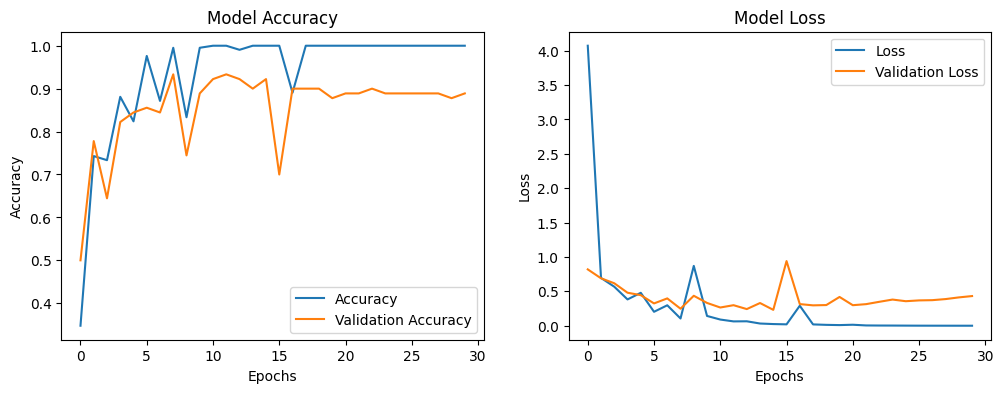

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pyplot as plt

# Function to load data from a directory
def load_data_from_directory(directory_path, label):
    data = []
    labels = []

    if not os.path.exists(directory_path):
        print(f"Error: Directory {directory_path} not found.")
        return np.array([]), np.array([])

    files = [f for f in os.listdir(directory_path) if f.lower().endswith('.txt')]

    if len(files) == 0:
        print(f"No .txt files found in {directory_path}.")
        return np.array([]), np.array([])

    for filename in files:
        file_path = os.path.join(directory_path, filename)
        try:
            file_data = np.loadtxt(file_path)
            data.append(file_data)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {filename}: {e}")

    return np.array(data, dtype=np.float32), np.array(labels)

# Paths to your datasets
path_Healthy = '/content/drive/My Drive/PFA2_DataSet/DataSet/Healthy/Z'
path_Epileptic = '/content/drive/My Drive/PFA2_DataSet/DataSet/Elipy/N'
path_Seizure = '/content/drive/My Drive/PFA2_DataSet/DataSet/Seizeur/S'

# Load data
data_Healthy, labels_Healthy = load_data_from_directory(path_Healthy, label=0)
data_Epileptic, labels_Epileptic = load_data_from_directory(path_Epileptic, label=1)
data_Seizure, labels_Seizure = load_data_from_directory(path_Seizure, label=2)

# Combine data and labels
if data_Healthy.size > 0 and data_Epileptic.size > 0 and data_Seizure.size > 0:
    data_all = np.concatenate((data_Healthy, data_Epileptic, data_Seizure), axis=0)
    labels_all = np.concatenate((labels_Healthy, labels_Epileptic, labels_Seizure), axis=0)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data_all, labels_all, test_size=0.3, random_state=42)

    # Standardize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define the CNN model
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(3, activation='softmax')  # 3 classes
    ])

    # Compile the model
    model.compile( loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model and track time
    start_time = time.time()
    history = model.fit(X_train[..., np.newaxis], y_train, epochs=30, batch_size=32, validation_data=(X_test[..., np.newaxis], y_test), verbose=1)
    training_time = time.time() - start_time

    # Evaluate the model
    y_pred = model.predict(X_test[..., np.newaxis])
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred_classes)
    recall = recall_score(y_test, y_pred_classes, average='macro')
    precision = precision_score(y_test, y_pred_classes, average='macro')
    f1 = f1_score(y_test, y_pred_classes, average='macro')
    conf_matrix = confusion_matrix(y_test, y_pred_classes)

    # Print metrics
    print("\nFinal Evaluation Metrics:")
    print("Test Accuracy: ", accuracy)
    print("Test Recall (Sensitivity): ", recall)
    print("Test Precision: ", precision)
    print("Test F1 Score: ", f1)
    print("Confusion Matrix: \n", conf_matrix)
    print("Training Time (seconds): ", training_time)

    # Plot Training History
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

else:
    print("Error: Data loading failed. Ensure the files are present in the directories.")


with optimiser

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 622ms/step - accuracy: 0.3585 - loss: 287.4712 - val_accuracy: 0.3333 - val_loss: 104.8969
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 546ms/step - accuracy: 0.3304 - loss: 130.9755 - val_accuracy: 0.3889 - val_loss: 15.7384
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 945ms/step - accuracy: 0.5765 - loss: 21.8244 - val_accuracy: 0.3111 - val_loss: 7.9792
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 877ms/step - accuracy: 0.5396 - loss: 4.8933 - val_accuracy: 0.7444 - val_loss: 0.7095
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 565ms/step - accuracy: 0.8693 - loss: 0.4714 - val_accuracy: 0.7222 - val_loss: 1.0874
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 961ms/step - accuracy: 0.7735 - loss: 0.5294 - val_accuracy: 0.6667 - val_loss: 0.9284
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 572ms/step - accuracy: 0.7907 - loss: 0.5104 - val_accuracy: 0.6889 - val_loss: 0.7955
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 684ms/step - accuracy: 0.8415 - loss: 0.5110 - val_accuracy: 0.7667 - 

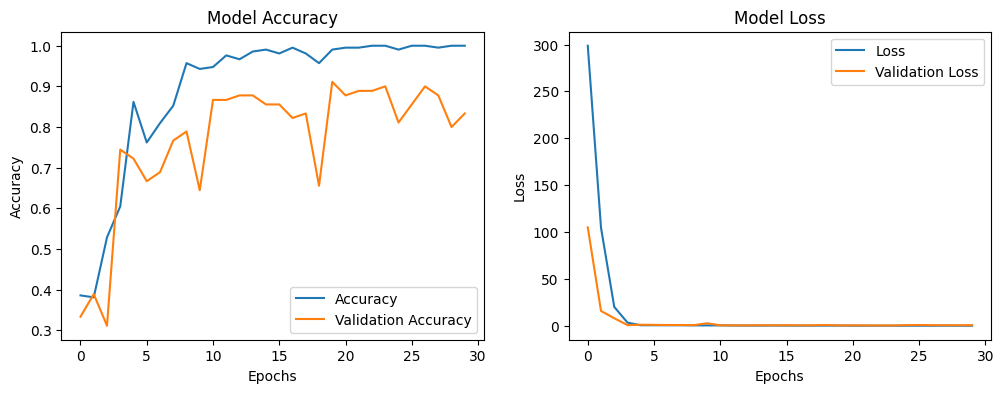

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score
import time
import matplotlib.pyplot as plt

# Function to load data from a directory
def load_data_from_directory(directory_path, label):
    data = []
    labels = []

    if not os.path.exists(directory_path):
        print(f"Error: Directory {directory_path} not found.")
        return np.array([]), np.array([])

    files = [f for f in os.listdir(directory_path) if f.lower().endswith('.txt')]

    if len(files) == 0:
        print(f"No .txt files found in {directory_path}.")
        return np.array([]), np.array([])

    for filename in files:
        file_path = os.path.join(directory_path, filename)
        try:
            file_data = np.loadtxt(file_path)
            data.append(file_data)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {filename}: {e}")

    return np.array(data, dtype=np.float32), np.array(labels)

# Paths to your datasets
path_Healthy = '/content/drive/My Drive/PFA2_DataSet/DataSet/Healthy/Z'
path_Epileptic = '/content/drive/My Drive/PFA2_DataSet/DataSet/Elipy/N'
path_Seizure = '/content/drive/My Drive/PFA2_DataSet/DataSet/Seizeur/S'

# Load data
data_Healthy, labels_Healthy = load_data_from_directory(path_Healthy, label=0)
data_Epileptic, labels_Epileptic = load_data_from_directory(path_Epileptic, label=1)
data_Seizure, labels_Seizure = load_data_from_directory(path_Seizure, label=2)

# Combine data and labels
if data_Healthy.size > 0 and data_Epileptic.size > 0 and data_Seizure.size > 0:
    data_all = np.concatenate((data_Healthy, data_Epileptic, data_Seizure), axis=0)
    labels_all = np.concatenate((labels_Healthy, labels_Epileptic, labels_Seizure), axis=0)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data_all, labels_all, test_size=0.3, random_state=42)

    # Define the CNN model
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(3, activation='softmax')  # 3 classes
    ])

    # Compile the model with Adam optimizer
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model and track time
    start_time = time.time()
    history = model.fit(X_train[..., np.newaxis], y_train, epochs=30, batch_size=32, validation_data=(X_test[..., np.newaxis], y_test), verbose=1)
    training_time = time.time() - start_time

    # Evaluate the model
    y_pred = model.predict(X_test[..., np.newaxis])
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred_classes)
    recall = recall_score(y_test, y_pred_classes, average='macro')
    precision = precision_score(y_test, y_pred_classes, average='macro')
    f1 = f1_score(y_test, y_pred_classes, average='macro')
    conf_matrix = confusion_matrix(y_test, y_pred_classes)

    # Print metrics
    print("\nFinal Evaluation Metrics:")
    print("Test Accuracy: ", accuracy)
    print("Test Recall (Sensitivity): ", recall)
    print("Test Precision: ", precision)
    print("Test F1 Score: ", f1)
    print("Confusion Matrix: \n", conf_matrix)
    print("Training Time (seconds): ", training_time)

    # Plot Training History
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

else:
    print("Error: Data loading failed. Ensure the files are present in the directories.")


Code with standarisation and Optimiser

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 685ms/step - accuracy: 0.3939 - loss: 2.9600 - val_accuracy: 0.4111 - val_loss: 0.8351
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 819ms/step - accuracy: 0.4572 - loss: 1.0577 - val_accuracy: 0.6667 - val_loss: 0.7380
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 570ms/step - accuracy: 0.7338 - loss: 0.7195 - val_accuracy: 0.7889 - val_loss: 0.6121
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 960ms/step - accuracy: 0.7741 - loss: 0.5591 - val_accuracy: 0.8111 - val_loss: 0.4865
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 588ms/step - accuracy: 0.7857 - loss: 0.4341 - val_accuracy: 0.8111 - val_loss: 0.4163
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 878ms/step - accuracy: 0.8099 - loss: 0.3958 - val_accuracy: 0.8333 - val_loss: 0.3905
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 597ms/step - accuracy: 0.8905 - loss: 0.2788 - val_accuracy: 0.8444 - val_loss: 0.3755
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 601ms/step - accuracy: 0.9525 - loss: 0.1967 - val_accuracy: 0.7778 - val_loss

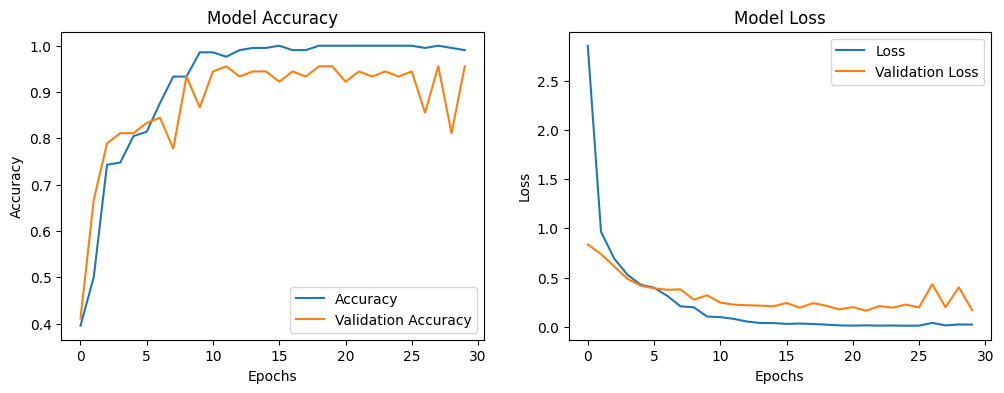

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score
import time
import matplotlib.pyplot as plt

# Function to load data from a directory
def load_data_from_directory(directory_path, label):
    data = []
    labels = []

    if not os.path.exists(directory_path):
        print(f"Error: Directory {directory_path} not found.")
        return np.array([]), np.array([])

    files = [f for f in os.listdir(directory_path) if f.lower().endswith('.txt')]

    if len(files) == 0:
        print(f"No .txt files found in {directory_path}.")
        return np.array([]), np.array([])

    for filename in files:
        file_path = os.path.join(directory_path, filename)
        try:
            file_data = np.loadtxt(file_path)
            data.append(file_data)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {filename}: {e}")

    return np.array(data, dtype=np.float32), np.array(labels)

# Paths to your datasets
path_Healthy = '/content/drive/My Drive/PFA2_DataSet/DataSet/Healthy/Z'
path_Epileptic = '/content/drive/My Drive/PFA2_DataSet/DataSet/Elipy/N'
path_Seizure = '/content/drive/My Drive/PFA2_DataSet/DataSet/Seizeur/S'

# Load data
data_Healthy, labels_Healthy = load_data_from_directory(path_Healthy, label=0)
data_Epileptic, labels_Epileptic = load_data_from_directory(path_Epileptic, label=1)
data_Seizure, labels_Seizure = load_data_from_directory(path_Seizure, label=2)

# Combine data and labels
if data_Healthy.size > 0 and data_Epileptic.size > 0 and data_Seizure.size > 0:
    data_all = np.concatenate((data_Healthy, data_Epileptic, data_Seizure), axis=0)
    labels_all = np.concatenate((labels_Healthy, labels_Epileptic, labels_Seizure), axis=0)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data_all, labels_all, test_size=0.3, random_state=42)

    # Apply standardization
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define the CNN model
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(3, activation='softmax')  # 3 classes
    ])

    # Compile the model with Adam optimizer
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model and track time
    start_time = time.time()
    history = model.fit(X_train[..., np.newaxis], y_train, epochs=30, batch_size=32, validation_data=(X_test[..., np.newaxis], y_test), verbose=1)
    training_time = time.time() - start_time

    # Evaluate the model
    y_pred = model.predict(X_test[..., np.newaxis])
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred_classes)
    recall = recall_score(y_test, y_pred_classes, average='macro')
    precision = precision_score(y_test, y_pred_classes, average='macro')
    f1 = f1_score(y_test, y_pred_classes, average='macro')
    conf_matrix = confusion_matrix(y_test, y_pred_classes)

    # Print metrics
    print("\nFinal Evaluation Metrics:")
    print("Test Accuracy: ", accuracy)
    print("Test Recall (Sensitivity): ", recall)
    print("Test Precision: ", precision)
    print("Test F1 Score: ", f1)
    print("Confusion Matrix: \n", conf_matrix)
    print("Training Time (seconds): ", training_time)

    # Plot Training History
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

else:
    print("Error: Data loading failed. Ensure the files are present in the directories.")
